In [2]:
from matplotlib import pyplot as plt

In [26]:
import numpy as np
import cv2 
import math

In [6]:
img = cv.imread('test2.jpg')
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(imgray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

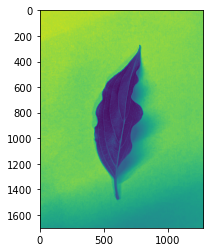

In [7]:
plt.imshow(imgray)

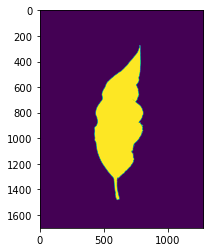

In [8]:
plt.imshow(thresh)

### Moments

In [9]:
cnt = contours[1]
M = cv.moments(cnt)
print( M )

{'m00': 244564.0, 'm10': 151329049.66666666, 'm01': 211135201.5, 'm20': 95670816350.33333, 'm11': 129051141390.66666, 'm02': 195986781775.8333, 'm30': 61699229397067.5, 'm21': 80562488880052.16, 'm12': 118785235336644.75, 'm03': 192762158383016.97, 'mu20': 2032826813.7847595, 'mu11': -1593145561.5224152, 'mu02': 13711085792.591309, 'mu30': -14780918694.703125, 'mu21': -59755931880.144775, 'mu12': 265112934886.91797, 'mu03': -109623174293.96875, 'nu20': 0.033987194956860145, 'nu11': -0.026636085487925835, 'nu02': 0.2292380948259065, 'nu30': -0.0004997123763600453, 'nu21': -0.0020202248140460317, 'nu12': 0.008962921549903607, 'nu03': -0.003706133432030952}


### centroid

In [10]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [11]:
cx

618

In [12]:
cy

863

### Contour Area

In [13]:
area = cv.contourArea(cnt)

In [14]:
area

244564.0

### Straight Bounding Rectangle

In [15]:
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [201, 204, 208],
        [202, 205, 209],
        [202, 205, 209]],

       [[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [201, 204, 208],
        [201, 204, 208],
        [202, 205, 209]],

       [[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [200, 203, 207],
        [201, 204, 208],
        [201, 204, 208]],

       ...,

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [124, 144, 161],
        [124, 144, 161],
        [124, 144, 161]],

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [124, 144, 161],
        [124, 144, 161],
        [124, 144, 161]],

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [124, 144, 161],
        [124, 144, 161],
        [124, 144, 161]]

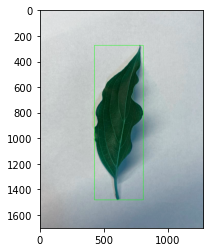

In [16]:
plt.imshow(img)

### rotated rectangle

In [17]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
x1,y1,w1,h1 = cv.boundingRect(box)
cv.drawContours(img,[box],0,(0,0,255),2)

array([[[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [201, 204, 208],
        [202, 205, 209],
        [202, 205, 209]],

       [[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [201, 204, 208],
        [201, 204, 208],
        [202, 205, 209]],

       [[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [200, 203, 207],
        [201, 204, 208],
        [201, 204, 208]],

       ...,

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [124, 144, 161],
        [124, 144, 161],
        [124, 144, 161]],

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [124, 144, 161],
        [124, 144, 161],
        [124, 144, 161]],

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [124, 144, 161],
        [124, 144, 161],
        [124, 144, 161]]

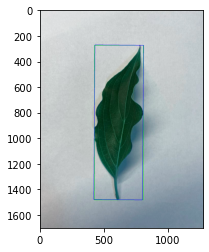

In [18]:
plt.imshow(img)

### Aspect Ratio

In [19]:
aspect_ratio = float(w1)/h1
print("the aspect ratio is", aspect_ratio)

the aspect ratio is 0.3212221304706854


### Extent

In [20]:
area = cv.contourArea(cnt)
print("the area of object is",area)
x1,y1,w1,h1 = cv.boundingRect(cnt)
rect_area = w1*h1
extent = float(area)/rect_area
print("the extent is", extent)

the area of object is 244564.0
the extent is 0.5332141455544412


### Solidity

In [22]:
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
print("the convex hull area is", hull_area)
solidity = float(area)/hull_area
print("the solidity is", solidity)

the convex hull area is 287992.5
the solidity is 0.8492026702084255


### orientation

In [23]:
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)

In [24]:
print("the angle of object is", angle)

the angle of object is 6.812007904052734
